<a href="https://colab.research.google.com/github/lucylao/data_analytics/blob/main/Stock_Market_Data_Analysis_Moderna_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform Stock market data analysis


# Task 1 - Environment Set Up

In [ ]:
! pip install pandas_datareader

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

# Task 2 - Data Collection

Gather stock data for Moderna, Pfizer, Merck and CSL

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['MRNA','PFE', 'BNTX','MRK','CSLLY']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [ ]:
# Summary Stats
MRNA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,73.662341,68.186159,71.044444,71.037698,1.957943e+07,71.037698
std,37.489092,34.466162,35.966855,35.917275,1.775654e+07,35.917275
min,18.549999,17.910000,18.469999,18.230000,1.824400e+06,18.230000
25%,51.515000,47.214999,50.460000,50.210000,8.169425e+06,50.210000
50%,69.174999,65.474998,67.500000,67.135002,1.399370e+07,67.135002
75%,82.492500,76.201252,80.047503,79.610003,2.412582e+07,79.610003
max,185.979996,166.199997,177.660004,173.160004,1.255523e+08,173.160004


In [ ]:
# General Info
MRNA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-31 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


# Task 3 - Exploratory Data Analysis (EDA)

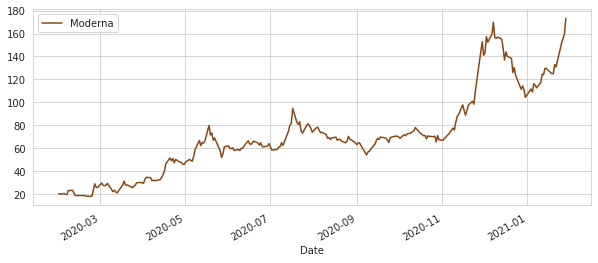

In [ ]:
# Let's see a historical view of the closing price
MRNA['Adj Close'].plot(legend=True,figsize=(10,4), color='saddlebrown', label='Moderna')

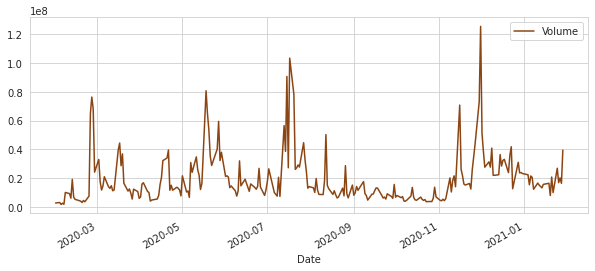

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
MRNA['Volume'].plot(legend=True,figsize=(10,4), color='saddlebrown')

In [ ]:
MRNA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,21.320000,20.049999,21.139999,20.510000,2833600,20.510000
2020-02-03,21.059999,19.700001,20.660000,20.379999,3155400,20.379999
2020-02-04,20.879999,19.750000,20.090000,20.870001,1824400,20.870001
2020-02-05,21.200001,19.670000,20.990000,20.049999,2656800,20.049999
2020-02-06,20.320000,19.700001,20.270000,19.879999,1929700,19.879999


In [ ]:
MRNA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,147.429993,137.250000,138.399994,147.000000,26970900,147.000000
2021-01-26,154.550003,145.000000,145.149994,151.929993,16964700,151.929993
2021-01-27,164.550003,149.000000,151.199997,155.729996,20262900,155.729996
2021-01-28,168.000000,153.619995,154.104996,159.550003,16497400,159.550003
2021-01-29,185.979996,166.199997,174.990005,173.160004,39518300,173.160004


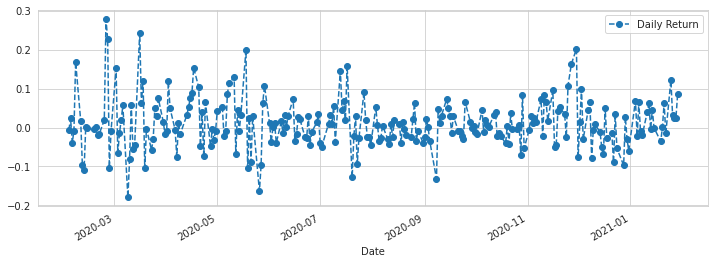

In [ ]:
# We'll use pct_change to find the percent change for each day
MRNA['Daily Return'] = MRNA['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
MRNA['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o', color='saddlebrown')

## Write your observations 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


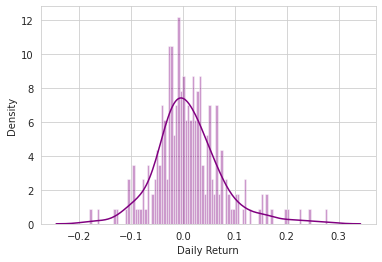

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(MRNA['Daily Return'].dropna(),bins=100,color='saddlebrown')

# Could have also done:
#MRNA['Daily Return'].hist()

## Write your observations 

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['MRNA','PFE','BNTX','MRK','CSLLY'],'yahoo',start,end)['Adj Close']

In [ ]:
# Let's take a quick look
closing_df.head()

Symbols,MRNA,PFE,BNTX,MRK,CSLLY
Date,,,,,
2020-01-31,20.510000,33.923119,29.209999,82.810669,101.920731
2020-02-03,20.379999,34.169064,30.270000,84.652199,103.692490
2020-02-04,20.870001,34.333035,32.919998,85.640816,105.771088
2020-02-05,20.049999,34.770283,29.250000,83.188675,106.176910
2020-02-06,19.879999,34.852268,32.930000,83.043289,107.226112


In [ ]:
closing_df.tail()

Symbols,MRNA,PFE,BNTX,MRK,CSLLY
Date,,,,,
2021-01-25,147.000000,36.878807,110.610001,81.150002,106.760002
2021-01-26,151.929993,36.908485,106.290001,80.250000,106.150002
2021-01-27,155.729996,35.850002,105.970001,77.070000,103.919998
2021-01-28,159.550003,35.860001,110.000000,77.919998,103.540001
2021-01-29,173.160004,35.900002,116.940002,77.070000,104.059998


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

## Write your observations 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


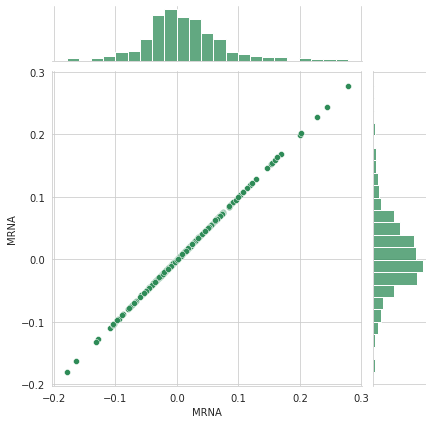

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('MRNA','MRNA',tech_rets,kind='scatter',color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


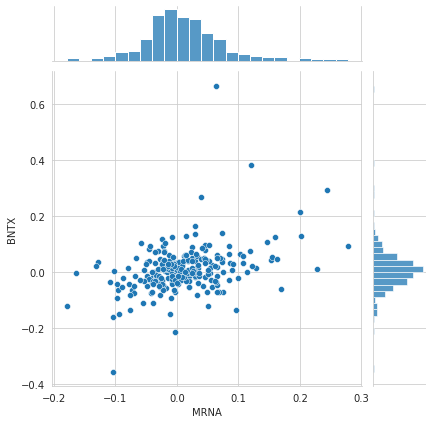

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('MRNA','BNTX',tech_rets,kind='scatter')

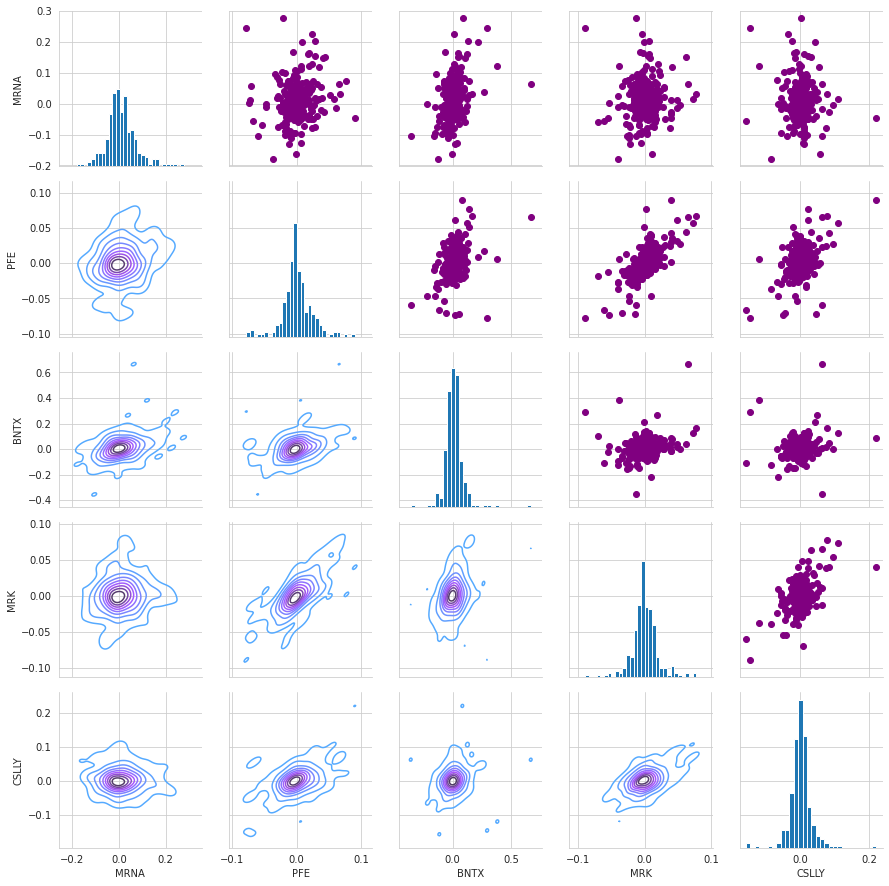

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

## Write your observations 

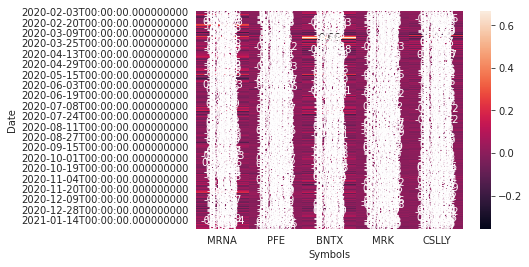

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna(),annot=True)

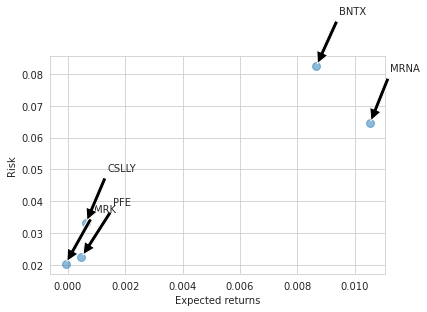

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )

## Write your observations 

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(MRNA['Daily Return'].dropna(),bins=100,color='saddlebrown')

KeyError: ignored

In [ ]:
# The 0.05 empirical quantile of daily returns
rets['MRNA'].quantile(0.05)

-0.08859369547452439

## Write your observations 

# Your final thoughts...